# Упражнение с моделями разного качества

## Загрузки

In [1]:
!python --version

Python 3.12.4


In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [5]:
import numpy as np
import pandas as pd
from sklearn import metrics
from importlib import reload
import matplotlib.pyplot as plt
import DS_risk

In [7]:
# Для перезагрузки ранее импортированного модуля.
DS_risk = reload(DS_risk)
from DS_risk import World, Bank_DS, DWH_DB, Tariff, Contract, Portfolio, Model

## Инициализации

In [10]:
W = World()    # Инициализация мира


Проверим мир на ошибки.
test(AVG) -  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test(0) -  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test(1) -  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Hello World!


In [12]:
DS = Bank_DS() # Активности банка
DWH = DWH_DB() # Пародия на базу данных

Hello DS!


In [14]:
# Cut-off предопределенный 
print('Score = %g\nPD = %g' % (W.Fate_cutoff_score, DS.sigmoid(W.Fate_cutoff_score)))

Score = -0.847298
PD = 0.3


## Создание нулевой рисковой модели

In [17]:
model0 = DS.create_model()

In [19]:
model0.Model_Sigma = 1

In [21]:
model0.info()

Model_id: 1, Mu: 0, Sigma: 1, Calib koef: 0, 1


In [23]:
s = W.get_god_score(5)
s

[array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799]),
 [1, 1, 1, 1, 1]]

In [25]:
m = model0.Score(s[0])
m

array([0.78677447, 1.35024563, 0.82738078, 2.13767435, 2.27815649])

## Создание тарифных планов

In [28]:
# Создадим тарифные планы
tariff_01 = Tariff('TR01')
tariff_01.info()

tariff_02 = Tariff('TR02', IR = 0.18, DUR = 36)
tariff_02.info()

Name: TR01 TypePlan = Annuity IR = 0.12 Duration = 24 MD = 11.9046
Name: TR02 TypePlan = Annuity IR = 0.18 Duration = 36 MD = 16.6512


In [30]:
tariff_01.print_plan(amount=100_000)

 N [' Долг+проц', '    Платеж', 'Плат(долг)', 'Плат(проц)', '  Кум долг', '  Кум проц', 'Кум оплаты']
01 [' 101000.00', '   4707.35', '   3707.35', '   1000.00', '   3707.35', '   1000.00', '   4707.35']
02 ['  97255.58', '   4707.35', '   3744.42', '    962.93', '   7451.77', '   1962.93', '   9414.69']
03 ['  93473.71', '   4707.35', '   3781.86', '    925.48', '  11233.63', '   2888.41', '  14122.04']
04 ['  89654.03', '   4707.35', '   3819.68', '    887.66', '  15053.32', '   3776.07', '  18829.39']
05 ['  85796.15', '   4707.35', '   3857.88', '    849.47', '  18911.20', '   4625.54', '  23536.74']
06 ['  81899.69', '   4707.35', '   3896.46', '    810.89', '  22807.66', '   5436.43', '  28244.08']
07 ['  77964.27', '   4707.35', '   3935.42', '    771.92', '  26743.08', '   6208.35', '  32951.43']
08 ['  73989.49', '   4707.35', '   3974.78', '    732.57', '  30717.86', '   6940.92', '  37658.78']
09 ['  69974.96', '   4707.35', '   4014.53', '    692.82', '  34732.38', '   7633

## Создание портфеля

In [33]:
# Создадим портфели
GP1 = Portfolio(world = W, dwh = DWH)
GP2 = Portfolio(world = W, dwh = DWH)
GP3 = Portfolio(world = W, dwh = DWH)
GP1.info()
GP2.info()
GP3.info()

ID = 1 Возраст портеля 0 мес Кол-во контрактов 0
ID = 2 Возраст портеля 0 мес Кол-во контрактов 0
ID = 3 Возраст портеля 0 мес Кол-во контрактов 0


In [35]:
N_const = 3000 # Пусть будут постоянные ежемесячные выдачи

In [37]:
# Создадим план продаж на основе созданных тарифных планов
#issue_plan_gp = [(tariff_01, 100_000) for i in range(N_const//2)] + [(tariff_02, 50_000) for i in range(N_const//2)]
#issue_plan_il = [(tariff_01, 30_000) for i in range(N_const//2)]
issue_plan_gp = [(tariff_01, 30_000) for i in range(N_const)]
print(len(issue_plan_gp))
#print(len(issue_plan_il))

3000


In [39]:
# фиксируем Cut_off
pd_cutoff = 0.15
score_cutoff = DS.logit(pd_cutoff)
print('%g' % score_cutoff)

-1.7346


In [41]:
for t in range(2*12):
    GP1.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model0)
    GP2.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model0)
    GP3.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model0)

DWH.update_dwh_dic() # обновим справочники DWH
GP1.info()
GP2.info()
GP3.info()

ID = 1 Возраст портеля 24 мес Кол-во контрактов 72000
ID = 2 Возраст портеля 24 мес Кол-во контрактов 72000
ID = 3 Возраст портеля 24 мес Кол-во контрактов 72000


## Точечные обращения

In [43]:
cntr = Contract.cntr_dic[13]
cntr.tariff.print_plan(cntr.amount)

 N [' Долг+проц', '    Платеж', 'Плат(долг)', 'Плат(проц)', '  Кум долг', '  Кум проц', 'Кум оплаты']
01 ['  30300.00', '   1412.20', '   1112.20', '    300.00', '   1112.20', '    300.00', '   1412.20']
02 ['  29176.67', '   1412.20', '   1123.33', '    288.88', '   2235.53', '    588.88', '   2824.41']
03 ['  28042.11', '   1412.20', '   1134.56', '    277.64', '   3370.09', '    866.52', '   4236.61']
04 ['  26896.21', '   1412.20', '   1145.91', '    266.30', '   4515.99', '   1132.82', '   5648.82']
05 ['  25738.85', '   1412.20', '   1157.36', '    254.84', '   5673.36', '   1387.66', '   7061.02']
06 ['  24569.91', '   1412.20', '   1168.94', '    243.27', '   6842.30', '   1630.93', '   8473.23']
07 ['  23389.28', '   1412.20', '   1180.63', '    231.58', '   8022.92', '   1862.51', '   9885.43']
08 ['  22196.85', '   1412.20', '   1192.43', '    219.77', '   9215.36', '   2082.28', '  11297.63']
09 ['  20992.49', '   1412.20', '   1204.36', '    207.85', '  10419.72', '   2290

In [44]:
print(cntr.tariff.PlanParam[cntr.mob] * cntr.amount)

[2.81042611e+03 1.41220417e+03 1.38437817e+03 2.78260011e+01
 2.86017781e+04 3.87891778e+03 3.24806958e+04]


In [52]:
cntr.duration

24

In [54]:
cntr.Ar

array([  0.        ,   0.        ,  13.70671451,  27.27771898,
        40.71435706,  54.01795913,  67.18984236,  80.2313109 ,
        93.143656  , 105.9281561 , 118.58607698])

In [56]:
cntr.log

''

## Обратимся к базе данных

In [48]:
LI = DWH.LI.reset_index(drop=True)
print(LI.shape)

# Добавим целевую 90+
ix_bad = LI['DOD_ID']>=4
LI['BADFLAG'] = 0
LI.loc[ix_bad,'BADFLAG'] = 1
LI.tail()

(2700000, 17)


,PORTFOLIO_ID,CNTR_ID,SD,DOD_ID,MOB,WRTOFF_ID,CLOSED_ID,AMOUNT,AMOUNTOVERDUE,PERCENT,PAYMENT,PAYMENT_CUM,PAYMENT_CNT,WOF_AMOUNT,WOF_PERCENT,PAYMENT_DISC_CUM,PAYMENT_DISC,BADFLAG
2699995,3,215996,24,0,0,0,0,30000.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2699996,3,215997,24,0,0,0,0,30000.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2699997,3,215998,24,0,0,0,0,30000.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2699998,3,215999,24,0,0,0,0,30000.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2699999,3,216000,24,0,0,0,0,30000.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


In [58]:
ix = LI['CNTR_ID'] == 1 #2659
LI[ix]

,PORTFOLIO_ID,CNTR_ID,SD,DOD_ID,MOB,WRTOFF_ID,CLOSED_ID,AMOUNT,AMOUNTOVERDUE,PERCENT,PAYMENT,PAYMENT_CUM,PAYMENT_CNT,WOF_AMOUNT,WOF_PERCENT,PAYMENT_DISC_CUM,PAYMENT_DISC,BADFLAG
0,1,1,1,0,0,0,0,30000,0,0,0,0,0,0,0,0,0,0
9000,1,1,2,0,1,0,0,28887.795833,0.0,0.0,1412.204167,1412.204167,1,0,0,1398.221947,1398.221947,0
27000,1,1,3,0,2,0,0,27764.469625,0.0,0.0,1412.204167,2824.408333,2,0,0,2782.600113,1384.378166,0
54000,1,1,4,0,3,0,0,26629.910154,0.0,0.0,1412.204167,4236.6125,3,0,0,4153.271564,1370.671451,0
90000,1,1,5,0,4,0,0,25484.005089,0.0,0.0,1412.204167,5648.816667,4,0,0,5510.37201,1357.100447,0
135000,1,1,6,0,5,0,0,24326.640974,0.0,0.0,1412.204167,7061.020833,5,0.0,0.0,6854.035819,1343.663809,0
189000,1,1,7,0,6,0,0,23157.703217,0.0,0.0,1412.204167,8473.225,6,0.0,0.0,8184.396025,1330.360206,0
252000,1,1,8,1,7,0,0,21977.076082,1180.627135,231.577032,0.0,8473.225,6,0.0,0.0,8184.396025,0.0,0
324000,1,1,9,1,8,0,0,20784.642676,1192.433406,0.0,1646.096969,10119.321969,7,0.0,0.0,9704.538959,1520.142934,0
405000,1,1,10,0,9,0,0,19580.284936,0.0,0.0,2616.561907,12735.883876,8,0.0,0.0,12096.965713,2392.426754,0


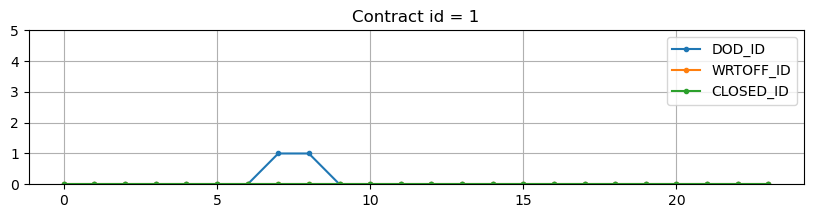

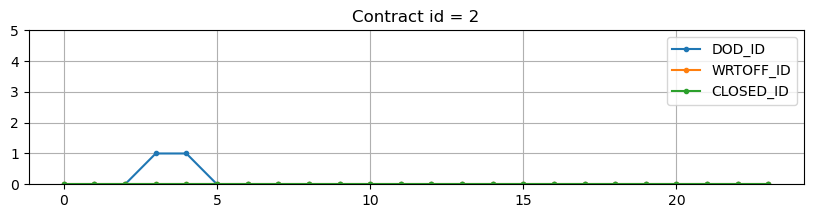

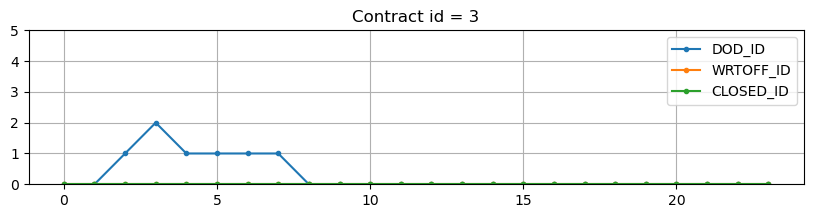

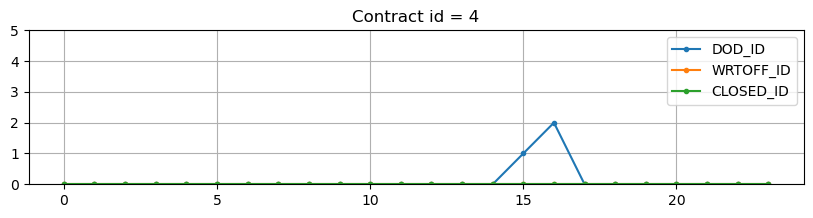

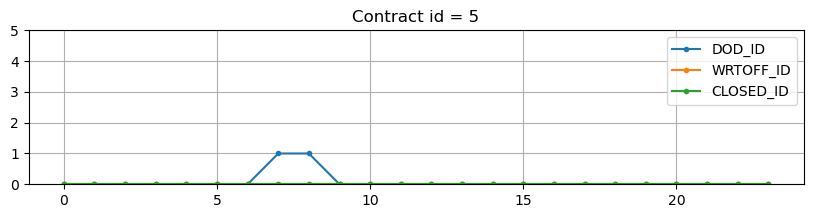

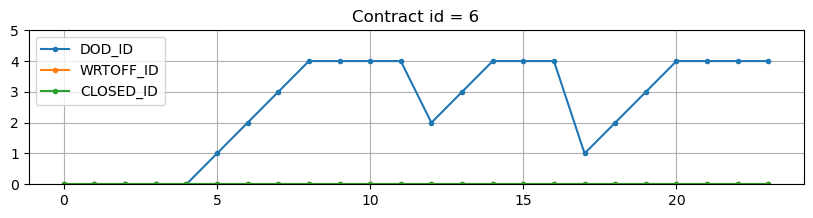

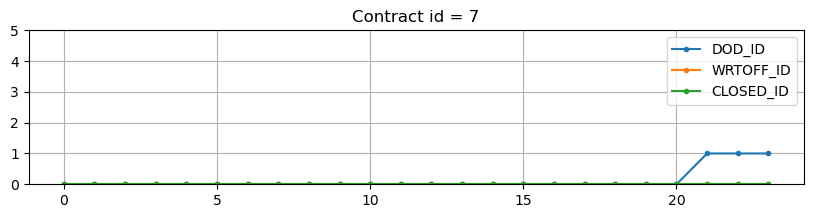

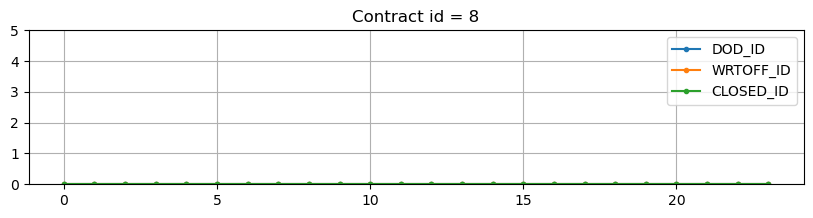

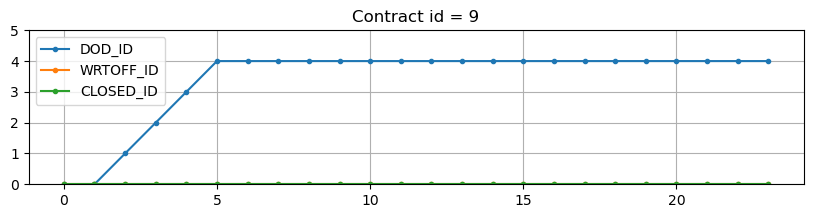

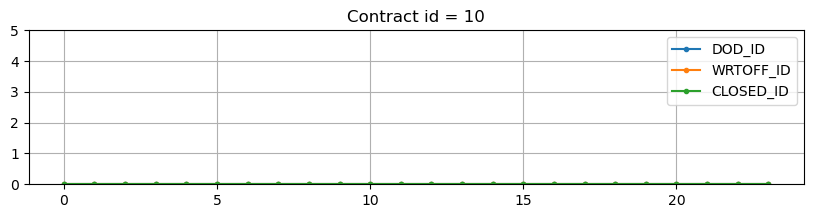

In [60]:
for i in range(1,11):
    ix = LI['CNTR_ID']==i
    plt.figure(figsize=[10,2])
    plt.title('Contract id = %i'%i)
    plt.plot(LI[ix].set_index('MOB')[['DOD_ID', 'WRTOFF_ID', 'CLOSED_ID']], '.-')
    plt.legend(['DOD_ID', 'WRTOFF_ID', 'CLOSED_ID'])
    plt.ylim([0,5])
    plt.grid()
    plt.show()

In [64]:
# Витрина - справочник контрактов
DMC = DWH.DMContract
print(DMC.shape)
DMC.head(10)

(216000, 20)


,PORTFOLIO_ID,CNTR_ID,ISSUE_DT,WRTOFF_DT,CLOSED_DT,AMOUNT,DURATION,IR,TARIFF,MODEL_PD,MODEL_SCORE,FATED_SCORE,FATED_RESULT,MODEL_ID,NUM_IN_QUEUE,PAYMENT_CUM,PAYMENT_DISC_CUM,PAYMENT_DISC_TW_CUM,WOF_AMOUNT,WOF_PERCENT
0,1,1,1,0,0,30000,24,0.12,TR01,0.044114,-3.075850,-2.060141,0,1,11,32506.742210,28887.795833,336435.480492,0.0,0.0
1,1,2,1,0,0,30000,24,0.12,TR01,0.083542,-2.395166,-1.099891,0,1,4,32506.276926,28887.795833,336488.963620,0.0,0.0
2,1,3,1,0,0,30000,24,0.12,TR01,0.041962,-3.128134,-0.877858,0,1,2,32569.731520,28887.795833,342561.296683,0.0,0.0
3,1,4,1,0,0,30000,24,0.12,TR01,0.124266,-1.952641,-1.100619,0,1,3,32523.203179,28887.795833,337654.260299,0.0,0.0
4,1,5,1,0,0,30000,24,0.12,TR01,0.129057,-1.909319,-1.117310,0,1,16,32506.742210,28887.795833,336435.480492,0.0,0.0
5,1,6,1,0,0,30000,24,0.12,TR01,0.093498,-2.271657,-0.191836,1,1,4,23375.353884,20875.883838,233958.026987,0.0,0.0
6,1,7,1,0,0,30000,24,0.12,TR01,0.145658,-1.769073,-1.142518,0,1,12,31124.146425,27786.603589,310936.775616,0.0,0.0
7,1,8,1,0,0,30000,24,0.12,TR01,0.090501,-2.307533,-1.396496,0,1,17,32480.695834,28887.795833,334017.099924,0.0,0.0
8,1,9,1,0,0,30000,24,0.12,TR01,0.128612,-1.913285,0.377564,1,1,18,1412.204167,1398.221947,1398.221947,0.0,0.0
9,1,10,1,0,0,30000,24,0.12,TR01,0.077610,-2.475265,-1.373117,0,1,23,32480.695834,28887.795833,334017.099924,0.0,0.0


In [66]:

ix_cls = (DMC['CLOSED_DT'] - DMC['ISSUE_DT']) > 30
ix_wof = DMC['WRTOFF_DT'] == 0
ix_iss = DMC['ISSUE_DT'] == 10
DMC[ ix_cls & ix_wof & ix_iss].head()

,PORTFOLIO_ID,CNTR_ID,ISSUE_DT,WRTOFF_DT,CLOSED_DT,AMOUNT,DURATION,IR,TARIFF,MODEL_PD,MODEL_SCORE,FATED_SCORE,FATED_RESULT,MODEL_ID,NUM_IN_QUEUE,PAYMENT_CUM,PAYMENT_DISC_CUM,PAYMENT_DISC_TW_CUM,WOF_AMOUNT,WOF_PERCENT


In [70]:
DMC[DMC['FATED_RESULT']==1].head()

,PORTFOLIO_ID,CNTR_ID,ISSUE_DT,WRTOFF_DT,CLOSED_DT,AMOUNT,DURATION,IR,TARIFF,MODEL_PD,MODEL_SCORE,FATED_SCORE,FATED_RESULT,MODEL_ID,NUM_IN_QUEUE,PAYMENT_CUM,PAYMENT_DISC_CUM,PAYMENT_DISC_TW_CUM,WOF_AMOUNT,WOF_PERCENT
5,1,6,1,0,0,30000,24,0.12,TR01,0.093498,-2.271657,-0.191836,1,1,4,23375.353884,20875.883838,233958.026987,0.0,0.0
8,1,9,1,0,0,30000,24,0.12,TR01,0.128612,-1.913285,0.377564,1,1,18,1412.204167,1398.221947,1398.221947,0.0,0.0
12,1,13,1,0,0,30000,24,0.12,TR01,0.087263,-2.347517,0.682551,1,1,17,18358.654167,17135.318288,117560.868168,0.0,0.0
13,1,14,1,0,0,30000,24,0.12,TR01,0.126023,-1.936590,-0.310117,1,1,1,32546.324978,28887.795833,340075.882823,0.0,0.0
17,1,18,1,0,0,30000,24,0.12,TR01,0.051162,-2.920248,-0.434957,1,1,11,32564.883901,28887.795833,341721.311479,0.0,0.0


In [72]:
DMC.tail(10)

,PORTFOLIO_ID,CNTR_ID,ISSUE_DT,WRTOFF_DT,CLOSED_DT,AMOUNT,DURATION,IR,TARIFF,MODEL_PD,MODEL_SCORE,FATED_SCORE,FATED_RESULT,MODEL_ID,NUM_IN_QUEUE,PAYMENT_CUM,PAYMENT_DISC_CUM,PAYMENT_DISC_TW_CUM,WOF_AMOUNT,WOF_PERCENT
215990,3,215991,24,0,0,30000,24,0.12,TR01,0.084819,-2.378602,-1.099151,0,1,4,0.0,0.0,0.0,0.0,0.0
215991,3,215992,24,0,0,30000,24,0.12,TR01,0.046636,-3.017627,-0.730712,1,1,10,0.0,0.0,0.0,0.0,0.0
215992,3,215993,24,0,0,30000,24,0.12,TR01,0.114711,-2.043494,-1.025025,0,1,10,0.0,0.0,0.0,0.0,0.0
215993,3,215994,24,0,0,30000,24,0.12,TR01,0.095609,-2.247000,-0.826942,1,1,30,0.0,0.0,0.0,0.0,0.0
215994,3,215995,24,0,0,30000,24,0.12,TR01,0.067677,-2.622930,-0.518971,1,1,12,0.0,0.0,0.0,0.0,0.0
215995,3,215996,24,0,0,30000,24,0.12,TR01,0.016701,-4.075429,-2.415116,0,1,4,0.0,0.0,0.0,0.0,0.0
215996,3,215997,24,0,0,30000,24,0.12,TR01,0.055535,-2.833610,-0.813381,1,1,7,0.0,0.0,0.0,0.0,0.0
215997,3,215998,24,0,0,30000,24,0.12,TR01,0.068540,-2.609330,-2.204644,0,1,18,0.0,0.0,0.0,0.0,0.0
215998,3,215999,24,0,0,30000,24,0.12,TR01,0.085780,-2.366287,-1.616356,0,1,19,0.0,0.0,0.0,0.0,0.0
215999,3,216000,24,0,0,30000,24,0.12,TR01,0.054440,-2.854677,-1.046564,0,1,21,0.0,0.0,0.0,0.0,0.0


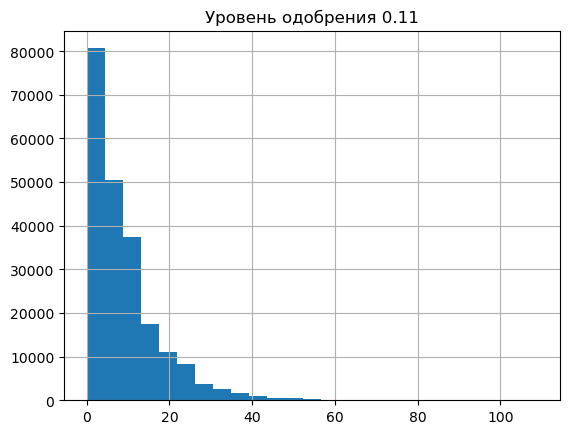

In [80]:
DMC.set_index('CNTR_ID')[['NUM_IN_QUEUE']].hist(bins=25)
plt.title('Уровень одобрения %0.2f' % (1/DMC['NUM_IN_QUEUE'].mean()))
#plt.yscale('log')
plt.show()

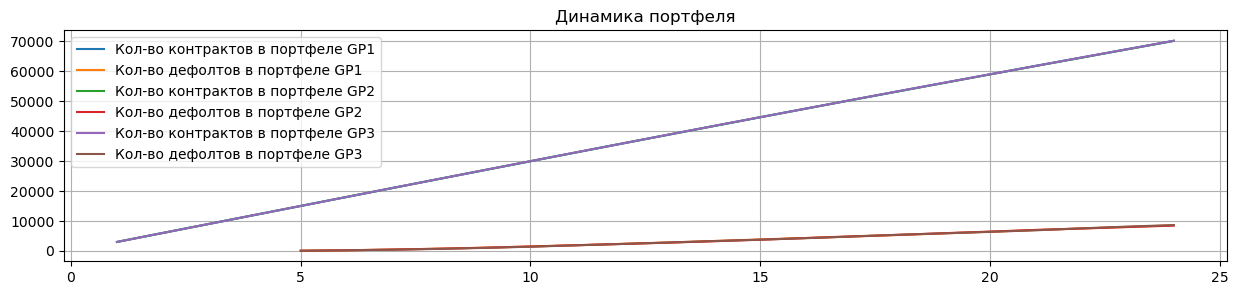

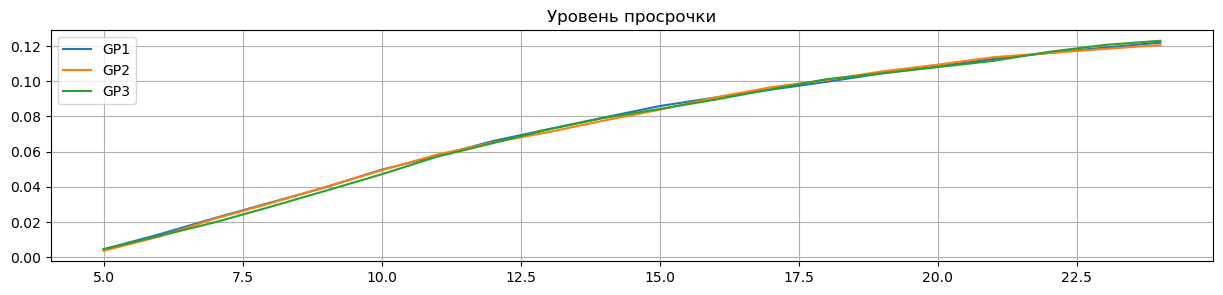

In [83]:
portfolio_list = LI['PORTFOLIO_ID'].unique()

ix = ((LI['WRTOFF_ID'] == 0)&
      (LI['CLOSED_ID'] == 0)
     )
ix_bad = LI['BADFLAG'] == 1

plt.figure(figsize=[15,3])
plt.title('Динамика портфеля')
T = {}
B = {}
leg = []
for p in portfolio_list:
    ix_gp = LI['PORTFOLIO_ID'] == p
    T[p] = LI[ix_gp&ix].groupby('SD')[['CNTR_ID']].count()
    B[p] = LI[ix_gp&ix&ix_bad].groupby('SD')[['CNTR_ID']].count()
    plt.plot(T[p])
    plt.plot(B[p])
    leg.append('Кол-во контрактов в портфеле GP%s' % p)
    leg.append('Кол-во дефолтов в портфеле GP%s' % p)
plt.legend(leg)
plt.grid()
plt.show()

plt.figure(figsize=[15,3])
plt.title('Уровень просрочки')
leg = []
for p in portfolio_list:
    plt.plot(B[p]/T[p])
    leg.append('GP%s' % p)
plt.legend(leg)
plt.grid()
plt.show()

In [85]:
col_on = ['PORTFOLIO_ID', 'CNTR_ID']
col_dmc = ['MODEL_SCORE', 'FATED_SCORE'] + col_on
ix = LI['MOB'] == 12
T = LI[ix].merge(DMC[col_dmc], on = col_on, how = 'left')

In [87]:
D_stat = {}
for p in portfolio_list:
    ix_p = T['PORTFOLIO_ID'] == p
    sd_list = T[ix_p]['SD'].unique()
    dic_stat = {}
    for sd in sd_list:
        ix = T['SD'] == sd
        dic_stat[sd-12] = [DS.gini(T[ix & ix_p], target = 'BADFLAG', score = 'MODEL_SCORE'),
                           T[ix & ix_p]['BADFLAG'].mean()
                          ]
    D_stat[p] = pd.DataFrame.from_dict(dic_stat, orient = 'index', columns=['GINI_%s'%p, 'DR_%s'%p])

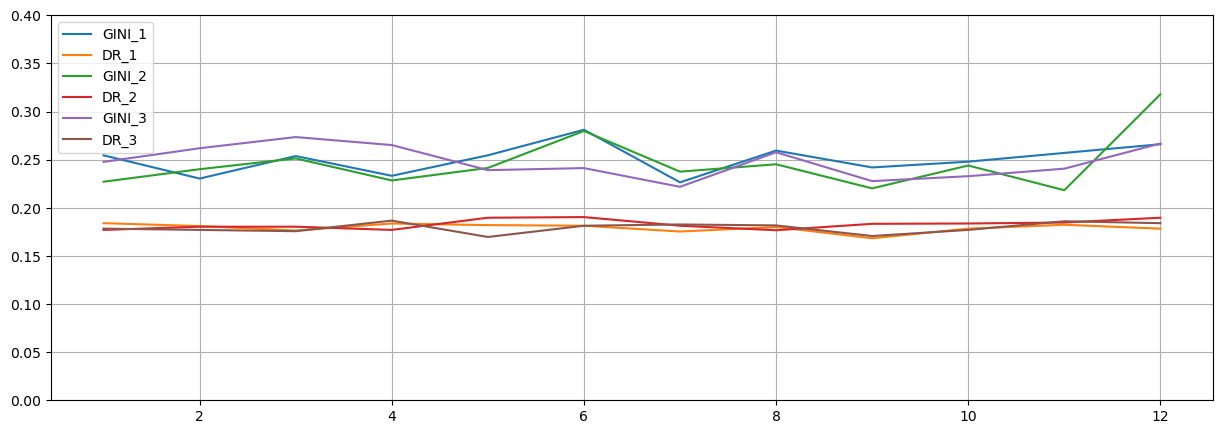

In [89]:
plt.figure(figsize=[15,5])
plt.ylim([0,0.4])
leg = []
for p in portfolio_list:
    plt.plot(D_stat[p])
    leg = leg + list(D_stat[p].columns)
plt.legend(leg)
plt.grid()
plt.show()

## Обучим модели на данных портфеля

In [92]:
TT = T.copy()

In [94]:
TT.tail()

,PORTFOLIO_ID,CNTR_ID,SD,DOD_ID,MOB,WRTOFF_ID,CLOSED_ID,AMOUNT,AMOUNTOVERDUE,PERCENT,PAYMENT,PAYMENT_CUM,PAYMENT_CNT,WOF_AMOUNT,WOF_PERCENT,PAYMENT_DISC_CUM,PAYMENT_DISC,BADFLAG,MODEL_SCORE,FATED_SCORE
107995,3,107996,24,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16960.572042,11,0.0,0.0,15894.467305,1253.259494,0,-2.412569,-1.954720
107996,3,107997,24,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16946.45,12,0.0,0.0,15894.467305,1253.259494,0,-3.197210,-1.235912
107997,3,107998,24,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16960.572042,11,0.0,0.0,15894.467305,1253.259494,0,-2.468288,-0.802114
107998,3,107999,24,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16946.45,12,0.0,0.0,15894.467305,1253.259494,0,-1.825595,-0.243075
107999,3,108000,24,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16946.45,12,0.0,0.0,15894.467305,1253.259494,0,-2.109085,-2.726168


In [96]:
model_dic = {}
for i, gini in zip([1,2,3],[0.30, 0.50, 0.70]):
    ix = TT['PORTFOLIO_ID'] == i
    model_dic[i] = DS.create_model(gini = gini, tto_sample=TT[ix])
    model_dic[i].info()

Model_id: 2, Mu: 0, Sigma: 1.677, Calib koef: 0, 1
Model_id: 3, Mu: 0, Sigma: 0.832, Calib koef: 0, 1
Model_id: 4, Mu: 0, Sigma: 0.324, Calib koef: 0, 1


In [98]:
model_dic

{1: <DS_risk.Model at 0x74b685d74230>,
 2: <DS_risk.Model at 0x74b685b4b9e0>,
 3: <DS_risk.Model at 0x74b685c49460>}

In [100]:
model_dic[1].log_dic['root_scalar'].root

1.6770377085728405

In [102]:
model2 = model_dic[1]

In [104]:
model2.log_dic['dic_fun']

{0.0: 0.7769781943831005,
 5.0: 0.10852642020917004,
 3.5677831431635276: 0.15037354071795336,
 1.7838915715817638: 0.28538474925085405,
 1.6242297537861028: 0.30722296301719365,
 1.6770377085728405: 0.3004207113340467,
 1.6820377085728413: 0.299316972927918}

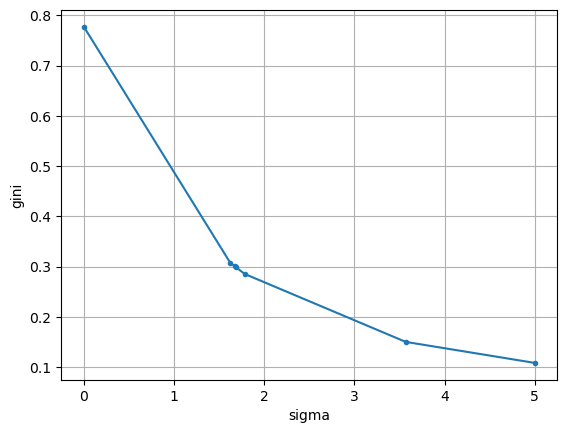

In [106]:
dic_fun = model2.log_dic['dic_fun']
x = list(dic_fun.keys())
x.sort()
y = [dic_fun[k] for k in x]
plt.plot(x, y, '.-')
plt.xlabel('sigma')
plt.ylabel('gini')
plt.grid()

In [108]:
TT

,PORTFOLIO_ID,CNTR_ID,SD,DOD_ID,MOB,WRTOFF_ID,CLOSED_ID,AMOUNT,AMOUNTOVERDUE,PERCENT,PAYMENT,PAYMENT_CUM,PAYMENT_CNT,WOF_AMOUNT,WOF_PERCENT,PAYMENT_DISC_CUM,PAYMENT_DISC,BADFLAG,MODEL_SCORE,FATED_SCORE
0,1,1,13,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16972.496376,11,0.0,0.0,15894.467305,1253.259494,0,-3.075850,-2.060141
1,1,2,13,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16972.031093,11,0.0,0.0,15894.467305,1253.259494,0,-2.395166,-1.099891
2,1,3,13,0,12,0,0,15894.467305,0.0,0.0,1412.204167,17035.485687,10,0.0,0.0,15894.467305,1253.259494,0,-3.128134,-0.877858
3,1,4,13,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16946.45,12,0.0,0.0,15894.467305,1253.259494,0,-1.952641,-1.100619
4,1,5,13,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16972.496376,11,0.0,0.0,15894.467305,1253.259494,0,-1.909319,-1.117310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107995,3,107996,24,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16960.572042,11,0.0,0.0,15894.467305,1253.259494,0,-2.412569,-1.954720
107996,3,107997,24,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16946.45,12,0.0,0.0,15894.467305,1253.259494,0,-3.197210,-1.235912
107997,3,107998,24,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16960.572042,11,0.0,0.0,15894.467305,1253.259494,0,-2.468288,-0.802114
107998,3,107999,24,0,12,0,0,15894.467305,0.0,0.0,1412.204167,16946.45,12,0.0,0.0,15894.467305,1253.259494,0,-1.825595,-0.243075


## Проведем калибровки

In [111]:
for i in model_dic:
    ix = TT['PORTFOLIO_ID'] == i
    TT.loc[ix, 'MODEL_SCORE_%s'%i] = model_dic[i].Score(np.array(TT[ix]['FATED_SCORE'].values))

In [113]:
for i in model_dic:
    ix = TT['PORTFOLIO_ID'] == i
    TT.loc[ix, 'MODEL_SCORE'] = TT.loc[ix, 'MODEL_SCORE_%s'%i]
    print(i, DS.calibration(model = model_dic[i], sample = TT[ix]))

1 (-1.2458545635167957, 0.31089648758301597)
2 (-0.7380846881723516, 0.8460942145737192)
3 (0.09912262175840256, 1.8562745120520794)


In [115]:
model2.log_dic

{'root_scalar':       converged: True
            flag: converged
  function_calls: 7
      iterations: 6
            root: 1.6770377085728405
          method: brentq,
 'dic_fun': {0.0: 0.7769781943831005,
  5.0: 0.10852642020917004,
  3.5677831431635276: 0.15037354071795336,
  1.7838915715817638: 0.28538474925085405,
  1.6242297537861028: 0.30722296301719365,
  1.6770377085728405: 0.3004207113340467,
  1.6820377085728413: 0.299316972927918},
 'LR': LogisticRegression(random_state=42)}

In [117]:
for i in model_dic:
    ix = TT['PORTFOLIO_ID'] == i
    TT.loc[ix, 'PD'] = model_dic[i].PD(TT.loc[ix, 'MODEL_SCORE_%s'%i])
    print(i, 'PD_mean %0.4f' %  TT.loc[ix, 'PD'].mean(), 'DR_mean %0.4f' % TT.loc[ix, 'BADFLAG'].mean())
DS.grade(TT, 'PD', 'GRADE')

1 PD_mean 0.1792 DR_mean 0.1792
2 PD_mean 0.1828 DR_mean 0.1828
3 PD_mean 0.1792 DR_mean 0.1792


In [119]:
col_pd = [c for c in TT.columns if 'PD' in c[:2]]
col_pd

['PD']

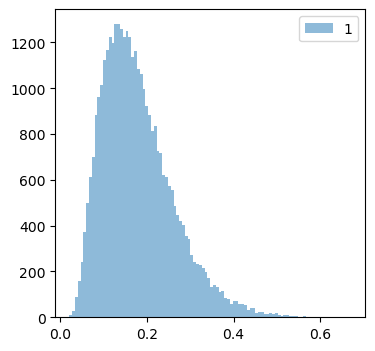

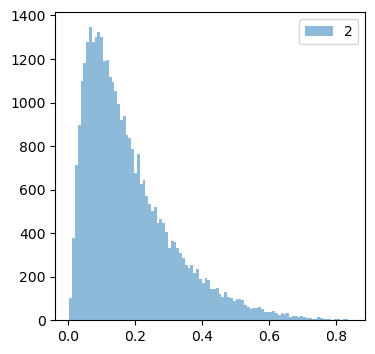

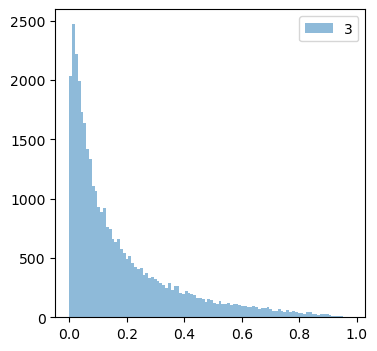

In [121]:
for i in model_dic:
    plt.figure(figsize=[4,4])
    ix = TT['PORTFOLIO_ID'] == i
    plt.hist(TT[ix]['PD'],bins=100, alpha = 0.5)
    plt.legend('%i'%i)
    plt.show()

In [123]:
TT_GR = {}
for i in model_dic:
    ix = TT['PORTFOLIO_ID'] == i
    TT_GR[i] = TT[ix].groupby('GRADE')[['BADFLAG', 'PD']].mean().rename(columns = {'BADFLAG': 'DR_%s'%i, 'PD': 'PD_MEAN_%s'%i})
    TT_GR[i]['CNT_%s'%i] = TT[ix].groupby('GRADE')[['BADFLAG']].count()

In [125]:
#TT_GR = TT.groupby('GRADE')[['BADFLAG', 'PD']].mean().rename(columns = {'BADFLAG': 'DR', 'PD': 'PD_MEAN'})
#TT_GR['PD_MEDIAN'] = TT.groupby('GRADE')[['PD']].median()
#TT_GR['CNT'] = TT.groupby('GRADE')[['BADFLAG']].count()

In [127]:
# col_cnt = [c for c in TT_GR.columns if c[:3] in ['CNT']]
# TT_GR[col_cnt].sum()

In [129]:
TT_GR_ = pd.concat([TT_GR[i].T for i in TT_GR]).T.sort_index()

In [131]:
TT_GR_

,DR_1,PD_MEAN_1,CNT_1,DR_2,PD_MEAN_2,CNT_2,DR_3,PD_MEAN_3,CNT_3
GRADE,,,,,,,,,
1,NaN,NaN,NaN,0.000000,0.004183,8.0,0.008403,0.003415,952.0
2,NaN,NaN,NaN,0.045455,0.006789,22.0,0.016636,0.006714,541.0
3,NaN,NaN,NaN,0.000000,0.009814,57.0,0.014201,0.009467,845.0
4,NaN,NaN,NaN,0.020548,0.013421,146.0,0.009574,0.013418,1149.0
5,0.000000,0.021385,1.0,0.007874,0.019088,381.0,0.007491,0.018831,1602.0
6,0.000000,0.027748,22.0,0.015258,0.026856,852.0,0.013993,0.026634,2001.0
7,0.047059,0.039216,170.0,0.021411,0.038051,1588.0,0.012708,0.037487,2518.0
8,0.026005,0.054842,846.0,0.032768,0.053637,2655.0,0.017345,0.053079,2998.0
9,0.068022,0.076867,2852.0,0.057406,0.075358,4024.0,0.025127,0.074639,3343.0


In [133]:
DS.print_master_scale()

Grage Right_value
    1 0.00552
    2 0.00781
    3 0.011
    4 0.0156
    5 0.0221
    6 0.0312
    7 0.0442
    8 0.0625
    9 0.0884
   10 0.125
   11 0.177
   12 0.25
   13 0.354
   14 0.5
   15 0.707
   16 1


['DR_1', 'PD_MEAN_1', 'DR_2', 'PD_MEAN_2', 'DR_3', 'PD_MEAN_3']


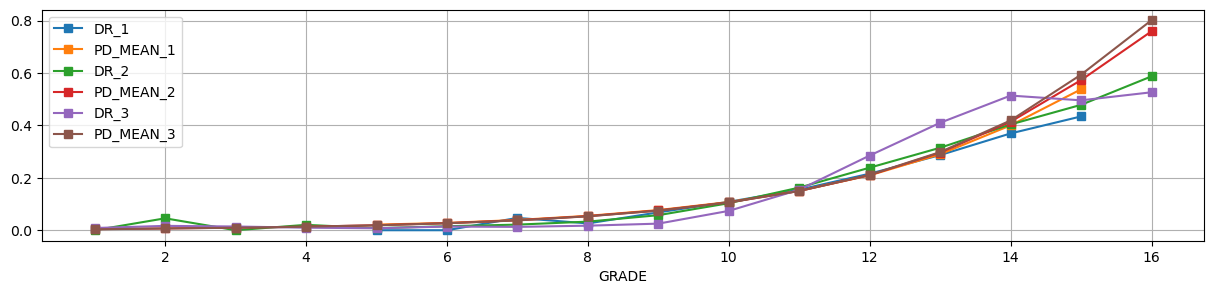

In [135]:
col_gr = [c for c in TT_GR_.columns if c[:2] in ['PD', 'DR']]
print(col_gr)
TT_GR_[col_gr].plot(figsize=[15,3], marker = 's')
plt.grid()
plt.legend(col_gr)
    # ['DR - уровень дефолта рейтинга',
    #         'PD - среднее значение вероятности дефлота в рейтинге',
    #         'PD - медианное значение вероятности дефлота в рейтинге'])


['CNT_1', 'CNT_2', 'CNT_3']


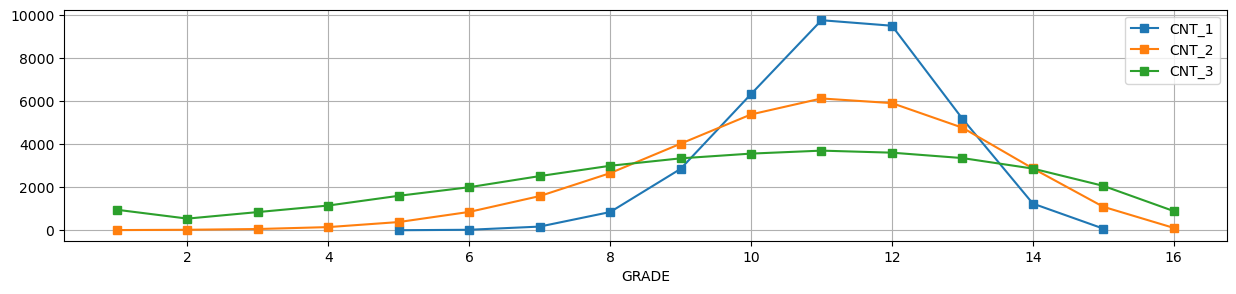

In [137]:
col_gr = [c for c in TT_GR_.columns if c[:3] in ['CNT']]
print(col_gr)
TT_GR_[col_gr].plot(figsize=[15,3], marker = 's')
plt.grid()
plt.legend(col_gr)
    # ['DR - уровень дефолта рейтинга',
    #         'PD - среднее значение вероятности дефлота в рейтинге',
    #         'PD - медианное значение вероятности дефлота в рейтинге'])
#plt.yscale('log')
plt.show()

In [139]:
model_dic

{1: <DS_risk.Model at 0x74b685d74230>,
 2: <DS_risk.Model at 0x74b685b4b9e0>,
 3: <DS_risk.Model at 0x74b685c49460>}

## Применим новые модели при одобрении

In [142]:
pd_cutoff = 0.05
pd_cutoff

0.05

In [144]:
for t in range(2*12):
    GP1.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model_dic[1])
    GP2.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model_dic[2])
    GP3.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model_dic[3])

DWH.update_dwh_dic() # обновим справочники DWH
GP1.info()
GP2.info()
GP3.info()

ID = 1 Возраст портеля 48 мес Кол-во контрактов 82317
ID = 2 Возраст портеля 48 мес Кол-во контрактов 82281
ID = 3 Возраст портеля 48 мес Кол-во контрактов 82294


In [145]:
pd_cutoff = 0.1
pd_cutoff

0.1

In [146]:
for t in range(2*12):
    GP1.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model_dic[1])
    GP2.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model_dic[2])
    GP3.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model_dic[3])

DWH.update_dwh_dic() # обновим справочники DWH
GP1.info()
GP2.info()
GP3.info()

ID = 1 Возраст портеля 72 мес Кол-во контрактов 79757
ID = 2 Возраст портеля 72 мес Кол-во контрактов 77166
ID = 3 Возраст портеля 72 мес Кол-во контрактов 75644


In [148]:
pd_cutoff = 0.15
pd_cutoff

0.15

In [149]:
for t in range(2*12):
    GP1.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model_dic[1])
    GP2.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model_dic[2])
    GP3.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model_dic[3])

DWH.update_dwh_dic() # обновим справочники DWH
GP1.info()
GP2.info()
GP3.info()

ID = 1 Возраст портеля 96 мес Кол-во контрактов 84637
ID = 2 Возраст портеля 96 мес Кол-во контрактов 80412
ID = 3 Возраст портеля 96 мес Кол-во контрактов 76507


In [150]:
LI = DWH.LI.reset_index(drop=True)
ix_bad = LI['DOD_ID']>=4
LI['BADFLAG'] = 0
LI.loc[ix_bad,'BADFLAG'] = 1
print(LI.shape)
LI.tail()

(19918059, 18)


,PORTFOLIO_ID,CNTR_ID,SD,DOD_ID,MOB,WRTOFF_ID,CLOSED_ID,AMOUNT,AMOUNTOVERDUE,PERCENT,PAYMENT,PAYMENT_CUM,PAYMENT_CNT,WOF_AMOUNT,WOF_PERCENT,PAYMENT_DISC_CUM,PAYMENT_DISC,BADFLAG
19918054,3,863996,96,0,0,0,0,30000.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
19918055,3,863997,96,0,0,0,0,30000.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
19918056,3,863998,96,0,0,0,0,30000.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
19918057,3,863999,96,0,0,0,0,30000.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
19918058,3,864000,96,0,0,0,0,30000.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


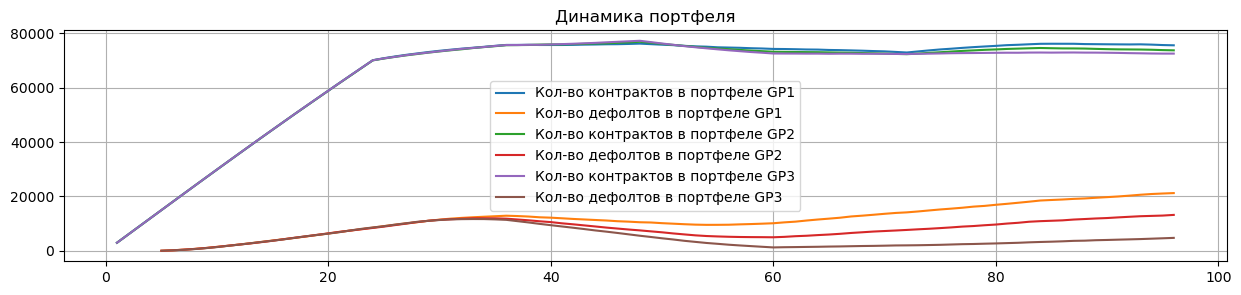

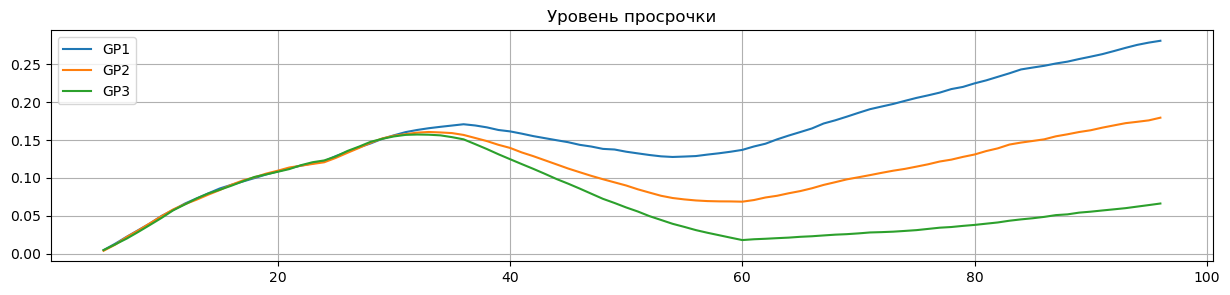

In [152]:
portfolio_list = LI['PORTFOLIO_ID'].unique()

ix = ((LI['WRTOFF_ID'] == 0)&
      (LI['CLOSED_ID'] == 0)
     )
ix_bad = LI['BADFLAG'] == 1

plt.figure(figsize=[15,3])
plt.title('Динамика портфеля')
T = {}
B = {}
leg = []
for p in portfolio_list:
    ix_gp = LI['PORTFOLIO_ID'] == p
    T[p] = LI[ix_gp&ix].groupby('SD')[['CNTR_ID']].count()
    B[p] = LI[ix_gp&ix&ix_bad].groupby('SD')[['CNTR_ID']].count()
    plt.plot(T[p])
    plt.plot(B[p])
    leg.append('Кол-во контрактов в портфеле GP%s' % p)
    leg.append('Кол-во дефолтов в портфеле GP%s' % p)
plt.legend(leg)
plt.grid()
plt.show()

plt.figure(figsize=[15,3])
plt.title('Уровень просрочки')
leg = []
for p in portfolio_list:
    plt.plot(B[p]/T[p])
    leg.append('GP%s' % p)
plt.legend(leg)
plt.grid()
plt.show()

In [155]:
for p in Portfolio.portfolio_dic:
    Portfolio.portfolio_dic[p].info()

ID = 1 Возраст портеля 96 мес Кол-во контрактов 84637
ID = 2 Возраст портеля 96 мес Кол-во контрактов 80412
ID = 3 Возраст портеля 96 мес Кол-во контрактов 76507


In [156]:
for m in Model.model_dic:
    Model.model_dic[m].info()

Model_id: 1, Mu: 0, Sigma: 1, Calib koef: 0, 1
Model_id: 2, Mu: 0, Sigma: 1.677, Calib koef: -1.24585, 0.310896
Model_id: 3, Mu: 0, Sigma: 0.832, Calib koef: -0.738085, 0.846094
Model_id: 4, Mu: 0, Sigma: 0.324, Calib koef: 0.0991226, 1.85627


In [157]:
for m in model_dic:
    print(m, end=' ')
    model_dic[m].info()

1 Model_id: 2, Mu: 0, Sigma: 1.677, Calib koef: -1.24585, 0.310896
2 Model_id: 3, Mu: 0, Sigma: 0.832, Calib koef: -0.738085, 0.846094
3 Model_id: 4, Mu: 0, Sigma: 0.324, Calib koef: 0.0991226, 1.85627


In [158]:
DMC = DWH.DMContract

In [159]:
ix = DMC['ISSUE_DT'] <= 24
DMC[ix].groupby('PORTFOLIO_ID')['NUM_IN_QUEUE'].mean()

PORTFOLIO_ID
1    9.079903
2    9.130694
3    9.071847
Name: NUM_IN_QUEUE, dtype: float64

In [160]:
ix = DMC['ISSUE_DT'] > 24
DMC[ix].groupby('PORTFOLIO_ID')['NUM_IN_QUEUE'].mean()

PORTFOLIO_ID
1    136.816134
2     20.199769
3     10.317907
Name: NUM_IN_QUEUE, dtype: float64

In [162]:
col_on = ['PORTFOLIO_ID', 'CNTR_ID']
col_dmc = ['MODEL_PD', 'MODEL_SCORE', 'FATED_SCORE', 'FATED_RESULT', 'MODEL_ID'] + col_on
ix = LI['MOB'] == 12
T = LI[ix].merge(DMC[col_dmc], on = col_on, how = 'left')


In [163]:
for m in Model.model_dic:
    ix_m = T['MODEL_ID'] == m
    T.loc[ix_m, 'PD'] = Model.model_dic[m].PD(T.loc[ix_m, 'MODEL_SCORE'])

In [164]:
DS.grade(T)

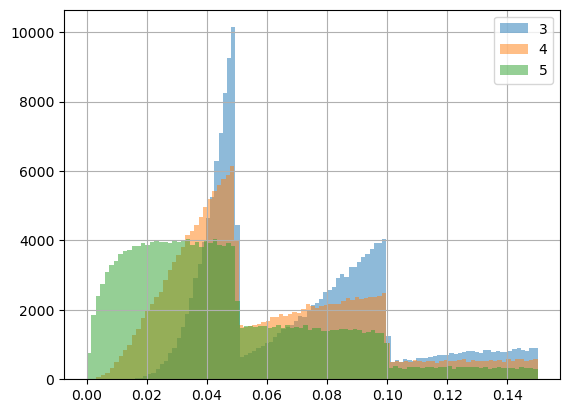

In [165]:
ix_sd = T['SD'] > 36
T[ix_sd].groupby('MODEL_ID')['PD'].hist(bins=100, alpha = 0.5)
plt.legend([3,4,5])

In [166]:
D_stat = {}
for p in portfolio_list:
    ix_p = T['PORTFOLIO_ID'] == p
    sd_list = T[ix_p]['SD'].unique()
    dic_stat = {}
    for sd in sd_list:
        ix = T['SD'] == sd
        dic_stat[sd-12] = [DS.gini(T[ix & ix_p], target = 'BADFLAG', score = 'MODEL_SCORE'),
                           T[ix & ix_p]['BADFLAG'].mean()
                          ]
    D_stat[p] = pd.DataFrame.from_dict(dic_stat, orient = 'index', columns=['GINI_%s'%p, 'DR_%s'%p])

In [167]:
D_fate = {}
for p in portfolio_list:
    ix_p = T['PORTFOLIO_ID'] == p
    sd_list = T[ix_p]['SD'].unique()
    dic_stat = {}
    for sd in sd_list:
        ix = T['SD'] == sd
        dic_stat[sd-12] = [DS.gini(T[ix & ix_p], target = 'BADFLAG', score = 'FATED_SCORE'),
                           T[ix & ix_p]['BADFLAG'].mean()
                          ]
    D_fate[p] = pd.DataFrame.from_dict(dic_stat, orient = 'index', columns=['GINI_%s'%p, 'DR_%s'%p])

In [168]:
T[ix & ix_p]

,PORTFOLIO_ID,CNTR_ID,SD,DOD_ID,MOB,WRTOFF_ID,CLOSED_ID,AMOUNT,AMOUNTOVERDUE,PERCENT,...,PAYMENT_DISC_CUM,PAYMENT_DISC,BADFLAG,MODEL_PD,MODEL_SCORE,FATED_SCORE,FATED_RESULT,MODEL_ID,PD,GRADE
753000,3,753001,96,1,12,0,0,15894.467305,1240.850984,171.353183,...,14641.207811,0.0,0,0.141946,-1.022665,-0.961571,0,4,0.141946,11
753001,3,753002,96,0,12,0,0,15894.467305,0.0,0.0,...,15894.467305,1253.259494,0,0.105758,-1.203456,-0.823552,1,4,0.105758,10
753002,3,753003,96,3,12,0,0,15894.467305,3685.817632,393.563727,...,12274.223478,0.0,0,0.086745,-1.321556,-0.711612,1,4,0.086745,9
753003,3,753004,96,0,12,0,0,15894.467305,0.0,0.0,...,15894.467305,1253.259494,0,0.076904,-1.392197,-1.504003,0,4,0.076904,9
753004,3,753005,96,0,12,0,0,15894.467305,0.0,0.0,...,15894.467305,1253.259494,0,0.027319,-1.977941,-1.760597,0,4,0.027319,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755995,3,755996,96,0,12,0,0,15894.467305,0.0,0.0,...,15894.467305,1253.259494,0,0.042407,-1.732633,-1.483543,0,4,0.042407,7
755996,3,755997,96,0,12,0,0,15894.467305,0.0,0.0,...,15894.467305,1253.259494,0,0.002357,-3.311503,-3.050155,0,4,0.002357,1
755997,3,755998,96,0,12,0,0,15894.467305,0.0,0.0,...,15894.467305,1253.259494,0,0.102143,-1.224364,-1.129215,0,4,0.102143,10
755998,3,755999,96,0,12,0,0,15894.467305,0.0,0.0,...,15894.467305,1253.259494,0,0.077253,-1.389555,-1.736848,0,4,0.077253,9


In [169]:
T.groupby(['PORTFOLIO_ID', 'MODEL_ID'])[['SD']].agg(['min', 'max'])-12

SD    
                      min max
PORTFOLIO_ID MODEL_ID        
1            1          1  24
             2         25  84
2            1          1  24
             3         25  84
3            1          1  24
             4         25  84

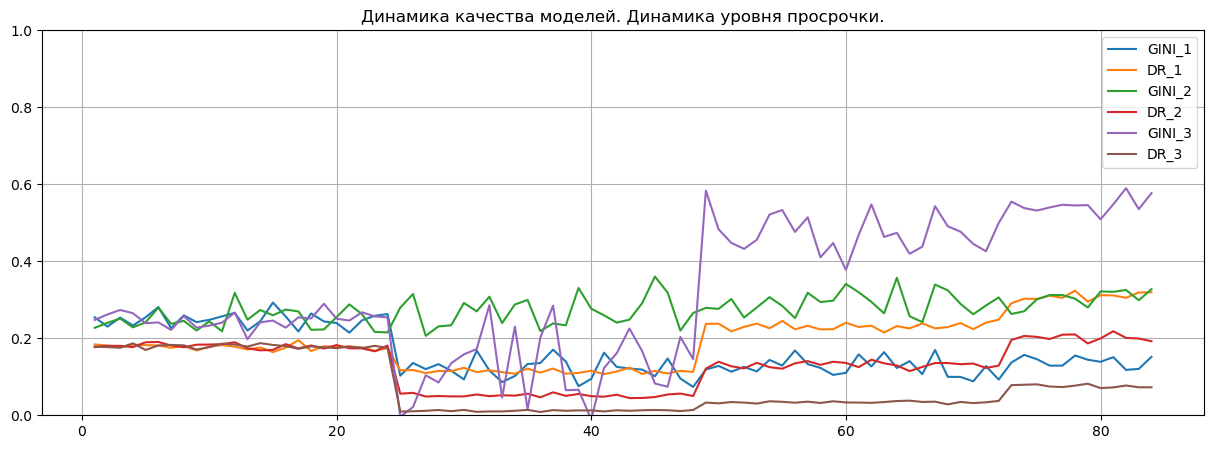

In [170]:
plt.figure(figsize=[15,5])
plt.ylim([0,None])
leg = []
for p in portfolio_list:
    plt.plot(D_stat[p])
    leg = leg + list(D_stat[p].columns)
plt.legend(leg)
plt.title('Динамика качества моделей. Динамика уровня просрочки.')
plt.grid()
plt.show()

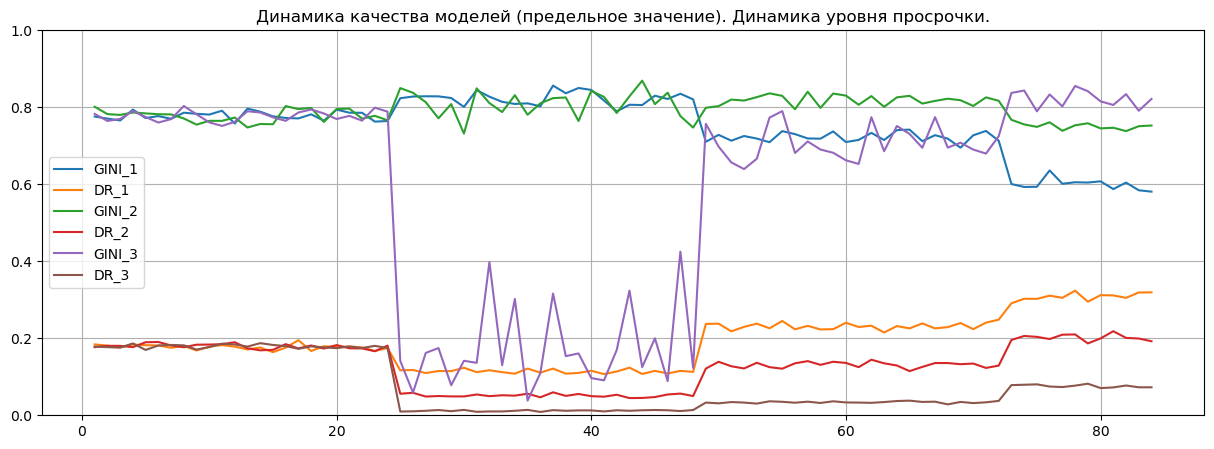

In [171]:
plt.figure(figsize=[15,5])
plt.ylim([0,None])
leg = []
for p in portfolio_list:
    plt.plot(D_fate[p])
    leg = leg + list(D_fate[p].columns)
plt.legend(leg)
plt.title('Динамика качества моделей (предельное значение). Динамика уровня просрочки.')
plt.grid()
plt.show()